Statsmodels is python module that provides classes and functions for estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data 

df=pd.read_excel('Data/Superstore_Sales_Records.xls',index_col='Order Date', parse_dates=True)

In [3]:
df.shape

(9994, 20)

In [5]:
df=df[df["Category"]=="Furniture"]
df=df.groupby(by=['Order Date']).agg({"Sales":sum})
df.sort_index(inplace=True)
df.head()

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/507276604.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=df.groupby(by=['Order Date']).agg({"Sales":sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [6]:
#resample on the monthly level 

df= df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


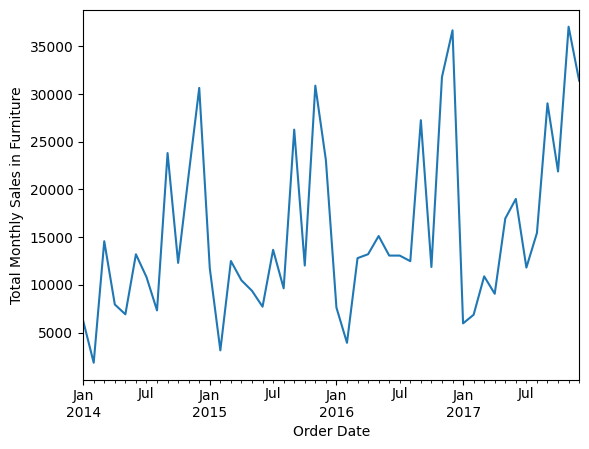

In [12]:
# Create the plot and get the Axes object
ax = df["Sales"].plot()
ax.autoscale(axis="x", tight=True)

# Set the label for the y-axis
ax.set_ylabel("Total Monthly Sales in Furniture")

# Show the plot
plt.show()



In [15]:
import seasonal

In [20]:
def seasonal_period_udf(counts):
    seasons, trend=seasonal.fit_seasons(counts,trend="spline")
    if seasons is not None:
        return len(seasons)
    else:
        return -1
    

In [21]:
seasonal_period_udf(df['Sales'].values)

12

Trend calculation
We can use functionalitis of statsmodels to get the trend value from a time series data.

Here we can use statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600) the Hodrick Prescott filter. It filter out time series 
 into a trend component 
 and a cyclical component.

 the Hodrick-Prescott (HP) Filter from statsmodels, which is a tool often used in time series analysis to separate a series into a cyclical component and a trend component.

In [22]:
from statsmodels.tsa.filters.hp_filter import hpfilter

sales_cycle, sales_trend=hpfilter(df['Sales'],lamb=1200)

lamb=1200: This is a smoothing parameter (lambda), which controls the degree of smoothing. The value of lambda is important because it defines how sensitive the filter is to short-term fluctuations:

A higher lambda value (like 1200) applies more smoothing and allows only the long-term trend to be captured, removing more of the short-term fluctuations (ideal for quarterly data or yearly trend analysis).

A lower lambda value would allow more cyclical variation (short-term fluctuations) to be captured and reduce the smoothing effect.

sales_cycle: This is the cyclical component, which represents the short-term fluctuations or deviations from the trend. It shows the high-frequency movements or oscillations that occur around the long-term trend.

sales_trend: This is the trend component, which represents the long-term smooth trend of your sales data. It captures the underlying growth or decline pattern while filtering out short-term variations.

In [23]:
sales_cycle

Order Date
2014-01-01    -2237.785515
2014-02-01    -7194.116597
2014-03-01     4988.582143
2014-04-01    -2182.411378
2014-05-01    -3742.908393
2014-06-01     2040.932142
2014-07-01     -826.051041
2014-08-01    -4774.134886
2014-09-01    11316.777440
2014-10-01     -546.914385
2014-11-01     8418.193169
2014-12-01    17262.340394
2015-01-01    -1826.442980
2015-02-01   -10579.349704
2015-03-01    -1343.107196
2015-04-01    -3486.616147
2015-05-01    -4704.357894
2015-06-01    -6484.098258
2015-07-01     -645.286765
2015-08-01    -4800.086824
2015-09-01    11723.284596
2015-10-01    -2616.805703
2015-11-01    16160.767377
2015-12-01     8308.040006
2016-01-01    -7205.428753
2016-02-01   -10964.215502
2016-03-01    -2173.990620
2016-04-01    -1875.412441
2016-05-01     -108.761638
2016-06-01    -2327.801041
2016-07-01    -2528.229846
2016-08-01    -3338.469115
2016-09-01    11193.779650
2016-10-01    -4459.459797
2016-11-01    15170.704149
2016-12-01    19768.249808
2017-01-01   -112

In [24]:
type(sales_cycle)

pandas.core.series.Series

In [25]:
sales_trend

Order Date
2014-01-01     8480.310515
2014-02-01     9033.774597
2014-03-01     9585.373857
2014-04-01    10127.248378
2014-05-01    10655.695393
2014-06-01    11165.193458
2014-07-01    11647.102041
2014-08-01    12094.481386
2014-09-01    12499.703360
2014-10-01    12851.161385
2014-11-01    13146.679531
2014-12-01    13383.626106
2015-01-01    13566.384580
2015-02-01    13713.723704
2015-03-01    13842.890196
2015-04-01    13962.314647
2015-05-01    14079.308394
2015-06-01    14198.277258
2015-07-01    14319.706765
2015-08-01    14438.679024
2015-09-01    14549.738404
2015-10-01    14643.429203
2015-11-01    14720.065123
2015-12-01    14777.779194
2016-01-01    14828.171753
2016-02-01    14889.766502
2016-03-01    14975.082620
2016-04-01    15087.502441
2016-05-01    15228.596638
2016-06-01    15398.373041
2016-07-01    15596.748846
2016-08-01    15821.701415
2016-09-01    16069.101250
2016-10-01    16332.036797
2016-11-01    16612.924651
2016-12-01    16910.465192
2017-01-01    172

In [26]:
type(sales_trend)

pandas.core.series.Series

Trend seems monotonically increasing from 2014-01-01 to 2017-12-01

Append the trend value  and cycle valus in additional columns

In [27]:
df['Trend']=sales_trend

In [28]:
df['cycle']=sales_cycle

In [29]:
df.head(5)

,Sales,Trend,cycle
Order Date,,,
2014-01-01,6242.525,8480.310515,-2237.785515
2014-02-01,1839.658,9033.774597,-7194.116597
2014-03-01,14573.956,9585.373857,4988.582143
2014-04-01,7944.837,10127.248378,-2182.411378
2014-05-01,6912.787,10655.695393,-3742.908393


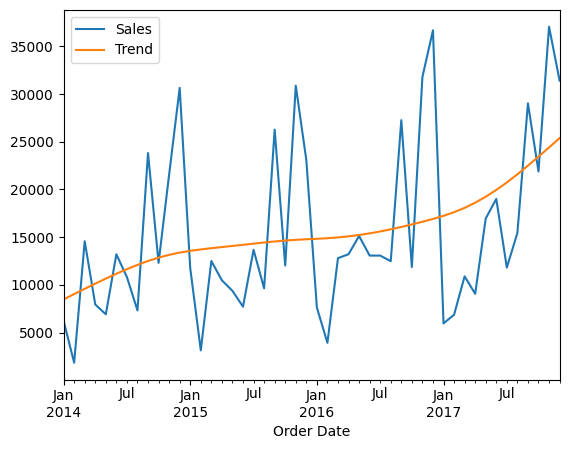

In [30]:
#plot 

df[["Sales","Trend"]].plot().autoscale(axis="x",tight=True)

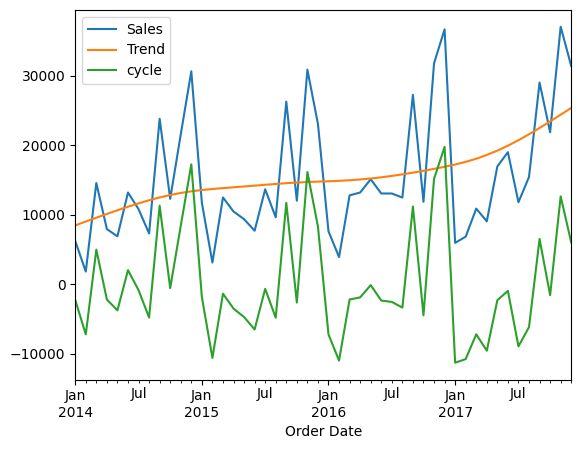

In [31]:
df[["Sales","Trend", "cycle"]].plot().autoscale(axis="x",tight=True)

Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points. That is, no matter where you take your observations, the result should be same. A series that shows seasonality is not stationary.

How to test if a series is stationary?

A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis 
 is that the series is nonstationary, and contains a unit root. The alternate hypothesis 
 supports stationarity. The augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin tests are stationarity tests.

In [32]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [33]:
# Load a seasonal dataset
df1 = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

df1.head(5)



,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
# Load a nonseasonal dataset
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the augmented Dickey-Fuller Test. In this test the null hypothesis states that 
 (this is also called a unit test).

The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value (p<0.05
) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is not stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

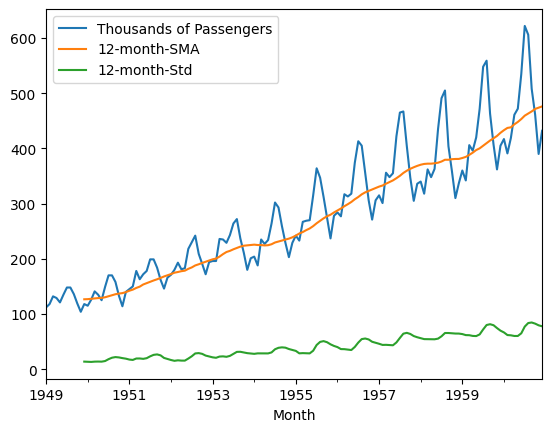

In [35]:
df1['12-month-SMA']=df1["Thousands of Passengers"].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();

Not only is this dataset seasonal with a clear upward trend, the standard deviation increases over time as well.

In [36]:
df1_adf_test_result = adfuller(df1['Thousands of Passengers'],autolag='AIC')

df1_adf_test_result

(np.float64(0.815368879206053),
 np.float64(0.9918802434376411),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [38]:
print("Augmented Dickey-Fuller Test on Airline Data")

dfout=pd.Series(df1_adf_test_result[0:4],index=['ADF statistic','p-value','lags used','observation'])

for keys, value in df1_adf_test_result[4].items():
    dfout[f'critical value ({keys})']=value


dfout

Augmented Dickey-Fuller Test on Airline Data


ADF statistic             0.815369
p-value                   0.991880
lags used                13.000000
observation             130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

Here we have a very high p-value at 0.99, which provides weak evidence against the null hypothesis, and so we fail to reject the null hypothesis, and decide that our dataset is not stationary.
Note: in statistics we don't "accept" a null hypothesis - nothing is ever truly proven - we just fail to reject it.

Now let's apply the ADF test to stationary data with the Quaterly Total Alcohol Sales dataset.

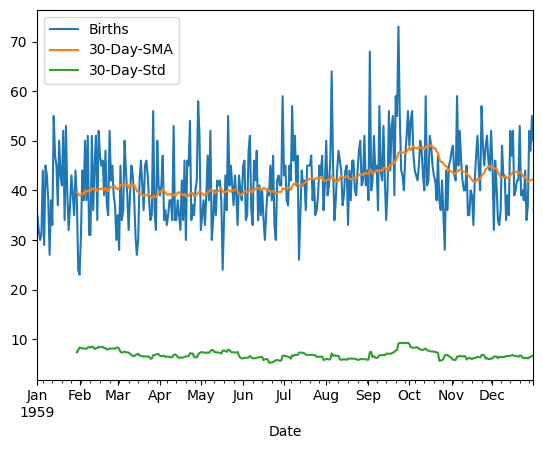

In [39]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();

In [41]:
print("Augmented Dickey-Fuller Test on female birth data")

df2_adf_test_result = adfuller(df2['Births'],autolag='AIC')

df2out=pd.Series(df2_adf_test_result[0:4],index=['ADF statistic','p-value','lags used','observation'])

for keys, value in df2_adf_test_result[4].items():
    df2out[f'critical value ({keys})']=value


df2out

Augmented Dickey-Fuller Test on female birth data


ADF statistic            -4.808291
p-value                   0.000052
lags used                 6.000000
observation             358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64

In this case our p-value is very low at 0.000052, and we do reject the null hypothesis. This dataset appears to have no unit root, and is stationary.

Granger Causality Tests
The Granger causality test is a a hypothesis test to determine if one time series is useful in forecasting another.

While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time.

This may indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, 
 and 
, the null hypothesis is that lagged values of 
 do not explain variations in 
.
In other words, it assumes that 
 doesn’t Granger-cause 
.

The stattools grangercausalitytests function offers four tests for granger non-causality of 2 timeseries

For this example Let's explore the Frniture sales and profit.

Key Concepts:
Granger Causality:

If variable 
𝑋
X Granger-causes 
𝑌
Y, this means that past values of 
𝑋
X contain useful information for predicting 
𝑌
Y (and vice versa).

It does not imply true causality but rather a predictive relationship.

Null Hypothesis (H0):

The null hypothesis for the test is that 
𝑋
X does not Granger-cause 
𝑌
Y. In other words, past values of 
𝑋
X do not help predict 
𝑌
Y.

The alternative hypothesis is that 
𝑋
X Granger-causes 
𝑌
Y.

Test Statistic:

The Granger causality test is usually implemented with an F-test or Likelihood Ratio Test to compare the fit of two models:

A restricted model (where past values of 
𝑋
X are excluded when predicting 
𝑌
Y).

An unrestricted model (where past values of 
𝑋
X are included).

Lag Selection:

The test requires you to select a lag length 
𝑝
p (number of past observations to include) when specifying the models. This can be selected based on information criteria such as Akaike Information Criterion (AIC) or Schwarz Information Criterion (SIC).

Steps to Perform Granger Causality Test:
Stationarity:

Granger causality tests assume that the time series are stationary (i.e., their statistical properties like mean and variance do not change over time).

If the series are not stationary, you may need to transform the data (e.g., differencing or logarithmic transformation) to achieve stationarity.

Determine Lag Length:

You typically choose a lag length using criteria like AIC or BIC to minimize overfitting or underfitting.

Run the Test:

Use statistical software (like Python with the statsmodels library or R) to run the test, which will compute the F-statistic and p-value.

Interpret Results:

A small p-value (typically less than 0.05) means you reject the null hypothesis, concluding that 
𝑋
X Granger-causes 
𝑌
Y.

A large p-value indicates no Granger-causal relationship.

In [42]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)

In [43]:
#plot the sales data of furniture
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum, 'Profit':sum})
df.sort_index(inplace=True)
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/1700177964.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum, 'Profit':sum})


,Sales,Profit
Order Date,,
2014-01-06,2573.820,746.4078
2014-01-07,76.728,-53.7096
2014-01-10,51.940,21.2954
2014-01-11,9.940,3.0814


<Axes: xlabel='Order Date'>

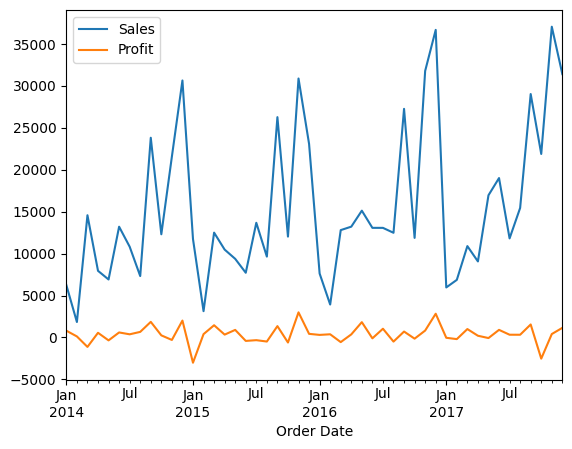

In [44]:
df = df.resample(rule='MS').sum()

df.plot()

Run the Test

In [45]:
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df[['Sales','Profit']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0106  , p=0.0183  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=6.4204  , p=0.0113  , df=1
likelihood ratio test: chi2=6.0182  , p=0.0142  , df=1
parameter F test:         F=6.0106  , p=0.0183  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9651  , p=0.0627  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=6.6535  , p=0.0359  , df=2
likelihood ratio test: chi2=6.2142  , p=0.0447  , df=2
parameter F test:         F=2.9651  , p=0.0627  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9778  , p=0.1337  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=7.0263  , p=0.0711  , df=3
likelihood ratio test: chi2=6.5289  , p=0.0885  , df=3
parameter F test:         F=1.9778  , p=0.1337  , df_denom=38, df_num=3


Lag 1 (1 period back) Results:
SSR-based F test:


F=6.0106, p-value = 0.0183.

Interpretation: This p-value (less than 0.05) suggests that Sales Granger-cause Profit at lag 1. You can reject the null hypothesis that Sales do not Granger-cause Profit.

SSR-based chi-squared test:


χ2=6.4204, p-value = 0.0113.

Interpretation: Again, the p-value is less than 0.05, reinforcing the conclusion that Sales Granger-cause Profit.

Likelihood ratio test:

χ2=6.0182, p-value = 0.0142.

Interpretation: The p-value indicates that there is statistically significant evidence that Sales Granger-cause Profit.

Parameter F test:


F=6.0106, p-value = 0.0183.

Interpretation: This result supports the conclusion that Sales Granger-cause Profit at lag 1.

Lag 2 (2 periods back) Results:
SSR-based F test:


F=2.9651, p-value = 0.0627.

Interpretation: The p-value here is greater than 0.05, meaning you fail to reject the null hypothesis that Sales do not Granger-cause Profit at lag 2. Thus, there is no significant relationship at this lag.

SSR-based chi-squared test:


χ2=6.6535, p-value = 0.0359.

Interpretation: This test gives a p-value less than 0.05, suggesting a significant relationship at lag 2, though weaker than at lag 1.

Likelihood ratio test:


χ2 =6.2142, p-value = 0.0447.

Interpretation: A p-value less than 0.05 suggests some evidence of causality at lag 2, but it is weaker than lag 1.

Parameter F test:


F=2.9651, p-value = 0.0627.

Interpretation: Similar to the SSR-based F test, this p-value suggests there is no significant Granger-causal relationship at lag 2.

Lag 3 (3 periods back) Results:
SSR-based F test:


F=1.9778, p-value = 0.1337.

Interpretation: The p-value is greater than 0.05, suggesting no significant relationship at lag 3. Thus, Sales do not Granger-cause Profit at this lag.

SSR-based chi-squared test:


χ2=7.0263, p-value = 0.0711.

Interpretation: Again, the p-value is greater than 0.05, so we fail to reject the null hypothesis at lag 3.

Likelihood ratio test:


χ2=6.5289, p-value = 0.0885.

Interpretation: The p-value is greater than 0.05, indicating no significant Granger causality at lag 3.

Parameter F test:

F=1.9778, p-value = 0.1337.

Interpretation: No evidence of Granger causality at lag 3.

Summary of Results:
Lag 1: There is a significant Granger-causal relationship between Sales and Profit. Sales appear to Granger-cause Profit.

Lag 2: The results are mixed. Some tests suggest a significant relationship (like the chi-squared test), but overall, the results aren't as strong as at lag 1.

Lag 3: There is no significant Granger-causal relationship between Sales and Profit at lag 3, as all tests have p-values greater than 0.05.

Thus, Sales Granger-cause Profit at lag 1, and this relationship weakens at longer lags. At lag 2 and beyond, the Granger causality is not statistically significant.

Time Series Decomposition

The decomposition of a time series attempts to isolate individual components from the original series.

- Trend
- Seasonality
- Error/Noise
These values let us see quickly and visually what each component contributes to overall behaviour.

Model types:

- Additive model - It is more appropriate when it seems that the trend is more linear and the seasonality and trend components seems to be constant over time(e.g each easr we add 1000 additional customers)
- Multiplicative model - It seems more appropriate when we are increasing(or decreasing) at a non-linear rate(e.g. each year we triple sales data)
Let up apply the above methods to our furniture sales data.

In [46]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


<Axes: xlabel='Order Date'>

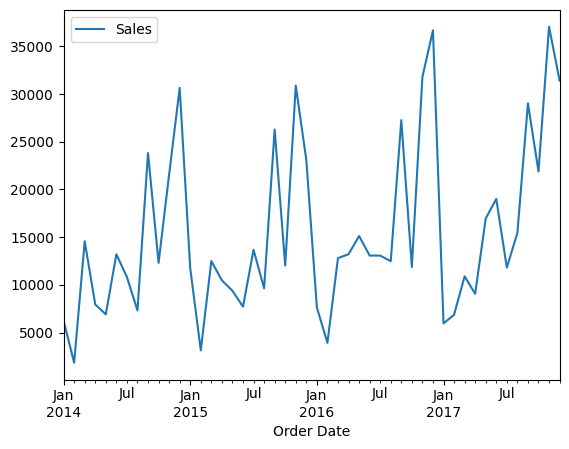

In [48]:
df.plot()

From above chart it seems the trend is somewhat constant so we can use additive model here.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')

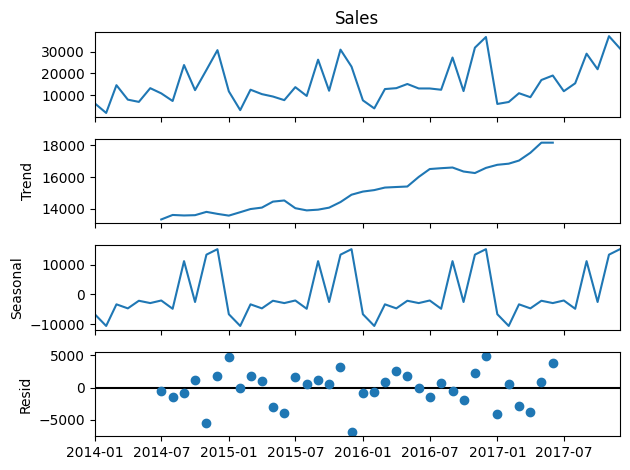

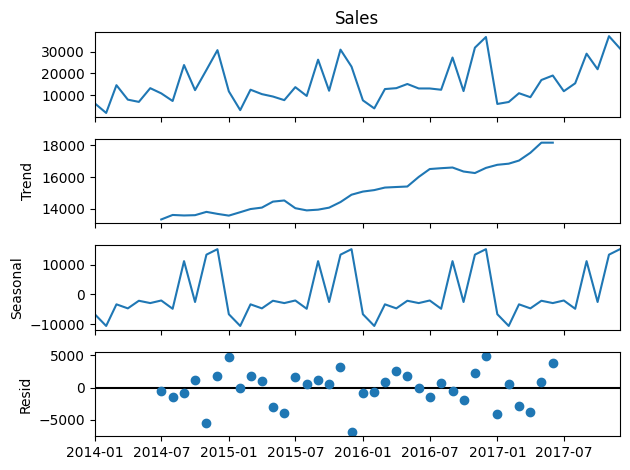

In [55]:
result.plot()

We have decomposed out sales series into three components Trend, Seasonal and Residual

he STL (Seasonal and Trend decomposition using LOESS) method from the statsmodels library. Here's a breakdown of what this code does and how it differs from seasonal_decompose:

Key Differences
Method of Decomposition:

seasonal_decompose (from statsmodels): It uses a classical decomposition method, which is based on simple moving averages (or other filters) for extracting the trend and seasonal components.

STL (Seasonal and Trend decomposition using LOESS): This method uses LOESS (Locally Estimated Scatterplot Smoothing) to decompose the time series. LOESS is a more flexible and robust method that fits a smoother trend and seasonal component to the data, especially in cases with complex seasonal patterns.

Trend and Seasonality Handling:

seasonal_decompose assumes a fixed seasonality (e.g., yearly, monthly) and divides the data into fixed seasonal and trend components. It can be more prone to errors if the seasonality changes or is more complex.

STL is more flexible because it fits the trend and seasonal components locally, allowing it to handle data with changing seasonal patterns and trends more effectively. The period parameter allows you to set the seasonality of the data (in your case, period=30).

Model Type:

seasonal_decompose supports additive and multiplicative models, meaning it can handle both scenarios where the components add up or multiply together to form the original series.

STL is always additive, so the components are assumed to add together. It is not designed to work with multiplicative models.

Output:

seasonal_decompose: The output of seasonal_decompose is a DecomposeResult object that contains observed, trend, seasonal, and residual components.

STL: The output of STL.fit() is a DecomposeResult object as well, but it includes more detailed components, such as:

Trend (smoothed trend component)

Seasonal (estimated seasonal component)

Residual (remaining noise or error after removing trend and seasonal effects)

Use Case:

seasonal_decompose works well for simpler, stable seasonal data that follows predictable patterns.

STL is more suitable for data with complex, non-stationary, or changing seasonalities.



Moving average and Exponentially moving avearge
In this section we will talk about Moving avearge and exponentially weighted moving average in terms of complexity and performance.

In Pandas we have:

Related Functions:

pandas.DataFrame.rolling(window)   Provides rolling window calculations

pandas.DataFrame.ewm(span)         Provides exponential weighted functions

In [56]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


Simple moving avaerage 

In [57]:
df['3_month_ma']=df['Sales'].rolling(window=3).mean()
df['6_month_ma']=df['Sales'].rolling(window=6).mean()

df.head(10)

,Sales,3_month_ma,6_month_ma
Order Date,,,
2014-01-01,6242.5250,NaN,NaN
2014-02-01,1839.6580,NaN,NaN
2014-03-01,14573.9560,7552.046333,NaN
2014-04-01,7944.8370,8119.483667,NaN
2014-05-01,6912.7870,9810.526667,NaN
2014-06-01,13206.1256,9354.583200,8453.314767
2014-07-01,10821.0510,10313.321200,9216.402433
2014-08-01,7320.3465,10449.174367,10129.850517
2014-09-01,23816.4808,13985.959433,11670.271317


<Axes: xlabel='Order Date'>

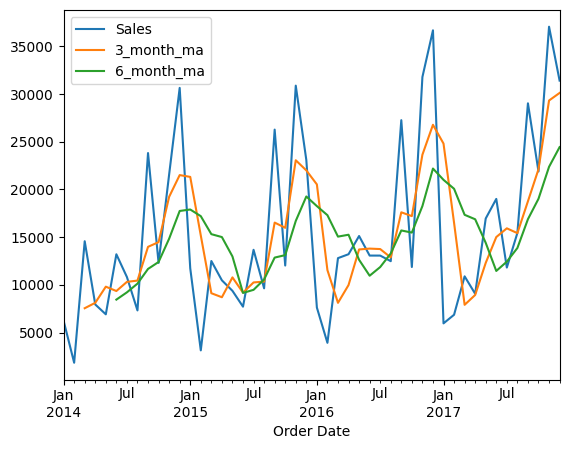

In [58]:
df.plot()

Issues with SMA

1.Samller window may lead to more noise and less signal

2.It will always lag by the size of the window

3.It never gonna reach the peak or valley of the data due to averaging.

4.Extreme historical values can skew the SMA significantly.

![Screenshot 2025-03-31 at 12.41.03 PM.png](<attachment:Screenshot 2025-03-31 at 12.41.03 PM.png>)
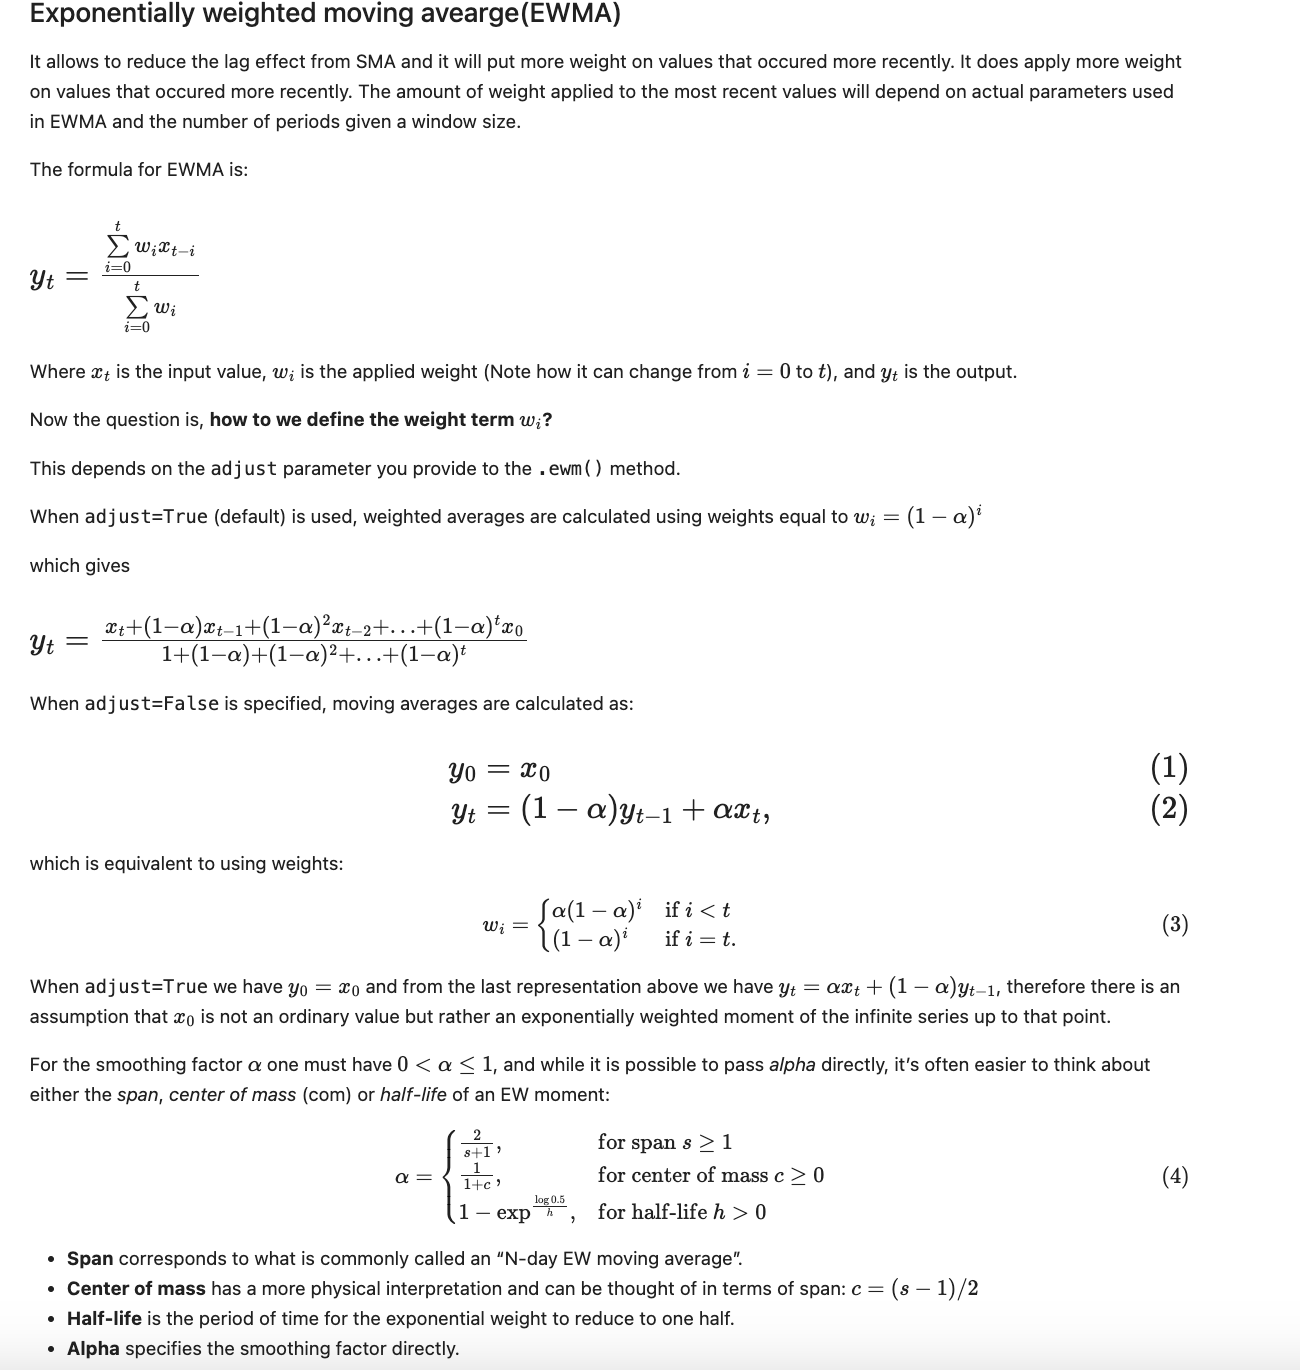

We have to pass precisely one of the above into the .ewm() function. For our data we'll use span=12.

In [59]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)



/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/898379941.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [60]:
#append ewma for span of three months
df['3-span-EWMA'] = df['Sales'].ewm(span=12, adjust=False).mean()

<Axes: xlabel='Order Date'>

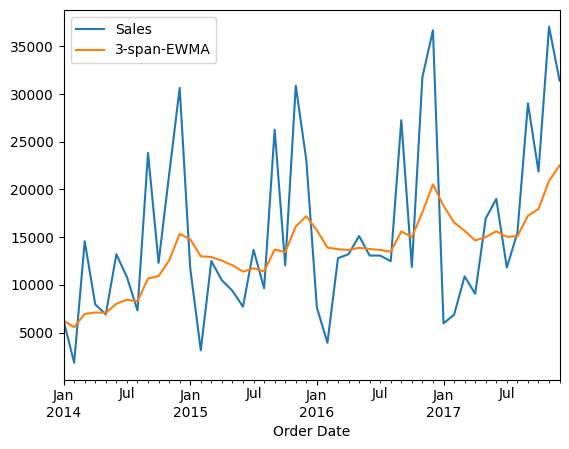

In [61]:
df.plot()

<Axes: xlabel='Order Date'>

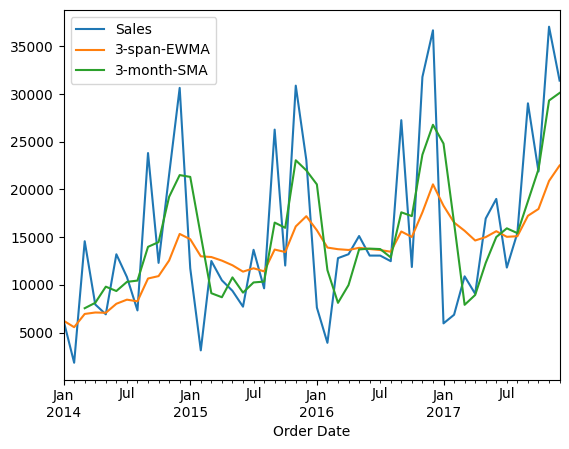

In [62]:
#append SMA with window size of 3
df['3-month-SMA'] = df['Sales'].rolling(window=3).mean()

df.plot()

Note that Simple exponential smoothing technique does a poor job of forecasting when there is a trend in the data as seen above.

Holt-Winters Methods
In the above section we use Simple Exponential Smoothing using just one smoothing factor 
(alpha). But that did not do well on accounting other factors like trend and seasonality. Now we will look at some advanced methods like Double and Triple Exponential Smoothing with the Holt-Winters Methods.

Contents

Simple exponentially smoothing

Double exponential smoothing(Holt's method)

Triple exponential smoothing(Holt-Winters methods)

In [63]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [64]:
df.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

Note that inorder to build a Holt-Winter smoothing model, statsmodels needs to know the frequency of the data whether it's daily, monthly etc. We have already resampled the original data into start of each month(MS).

In [65]:
df.index.freq

<MonthBegin>

Simple Exponential Smoothing
A variatiob of the statsmodels Holt-Winters function provides Simple Exponential Smoothing.

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas .ewm() method:


Related Functions:
statsmodels.tsa.holtwinters.SimpleExpSmoothing(endog) 

In [66]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span=3
#define alpha
alpha = 2/(span+1)

#exponentially weightage moving average using pandas 
df['EWMA3'] = df['Sales'].ewm(alpha=alpha, adjust=False).mean()
#Simple exponential smoothing
df['SES3'] = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=alpha, 
                                                 optimized=False).fittedvalues.shift(-1)

df.head()

,Sales,EWMA3,SES3
Order Date,,,
2014-01-01,6242.525,6242.525000,6242.525000
2014-02-01,1839.658,4041.091500,4041.091500
2014-03-01,14573.956,9307.523750,9307.523750
2014-04-01,7944.837,8626.180375,8626.180375
2014-05-01,6912.787,7769.483688,7769.483688


NOTE: For some reason, when optimized=False is passed into .fit(), the statsmodels SimpleExpSmoothing function shifts fitted values down one row. We fix this by adding .shift(-1) after .fittedvalues

![Screenshot 2025-03-31 at 1.00.32 PM.png](<attachment:Screenshot 2025-03-31 at 1.00.32 PM.png>)
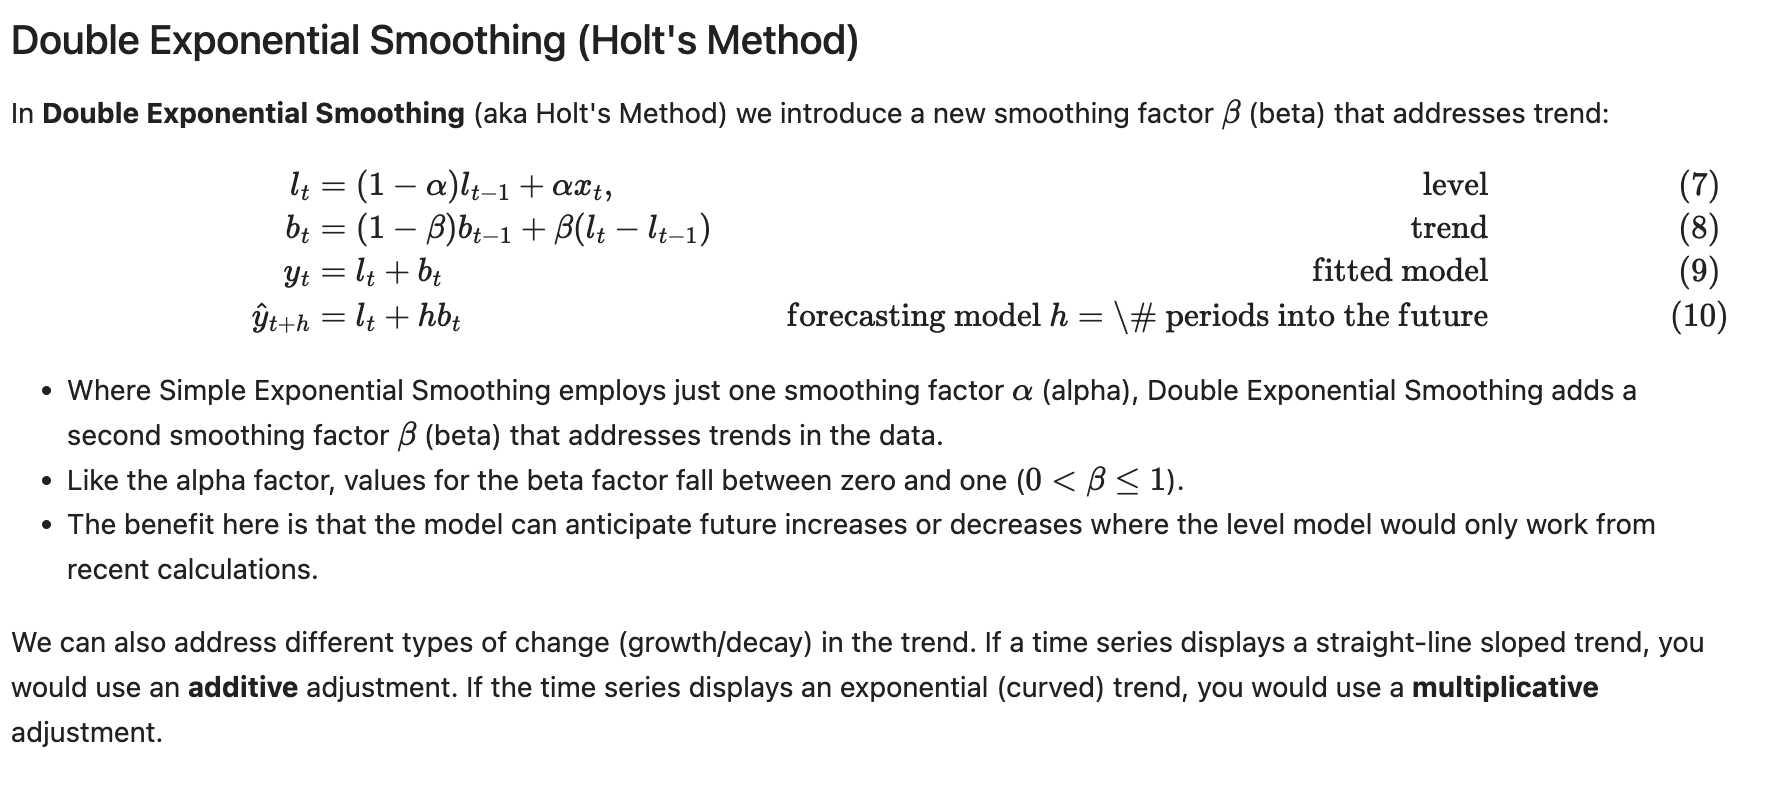

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESAdd'] = ExponentialSmoothing(df['Sales'], trend='add').fit().fittedvalues.shift(-1)

df.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd
Order Date,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718


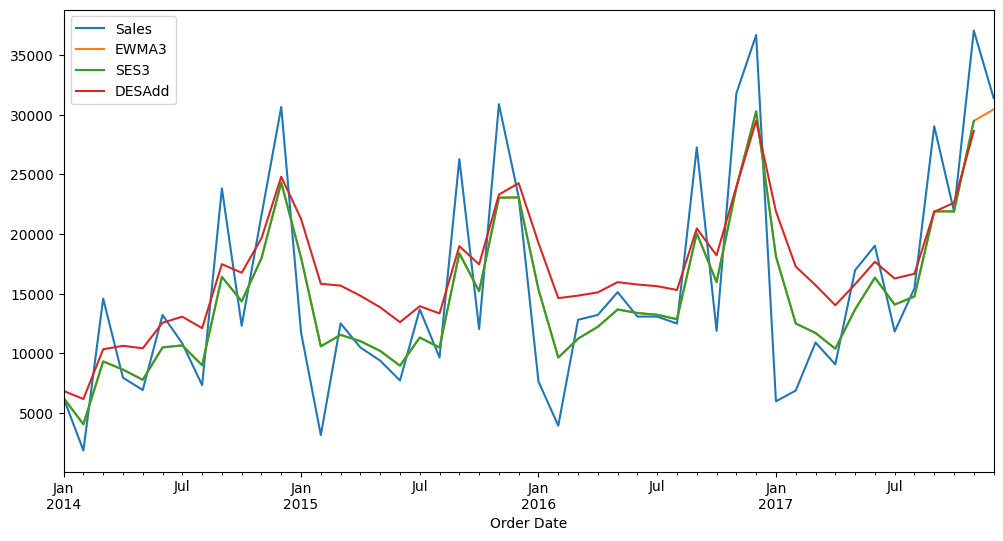

In [68]:
df[['Sales', 'EWMA3', 'SES3', 'DESAdd']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
Let's see if using a multiplicative seasonal adjustment helps.

In [69]:
df['DESMul'] = ExponentialSmoothing(df['Sales'], trend='mul').fit().fittedvalues.shift(-1)

df.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd,DESMul
Order Date,,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443,7335.675142
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556,6227.217244
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615,12683.059255
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469,13873.059436
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718,13809.276104


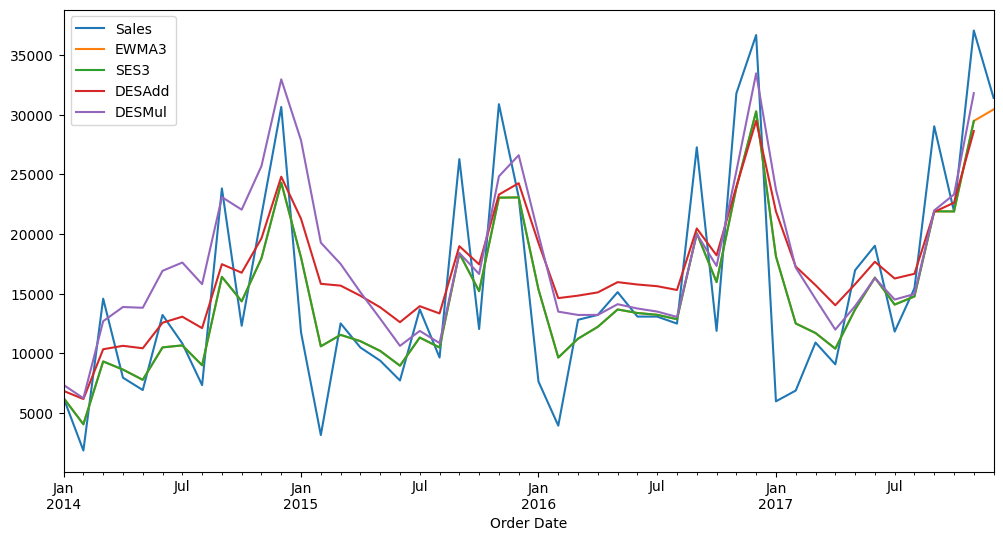

In [70]:
df[['Sales', 'EWMA3', 'SES3', 'DESAdd', 'DESMul']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In above case multiplicative adjustment overshoots actual values.

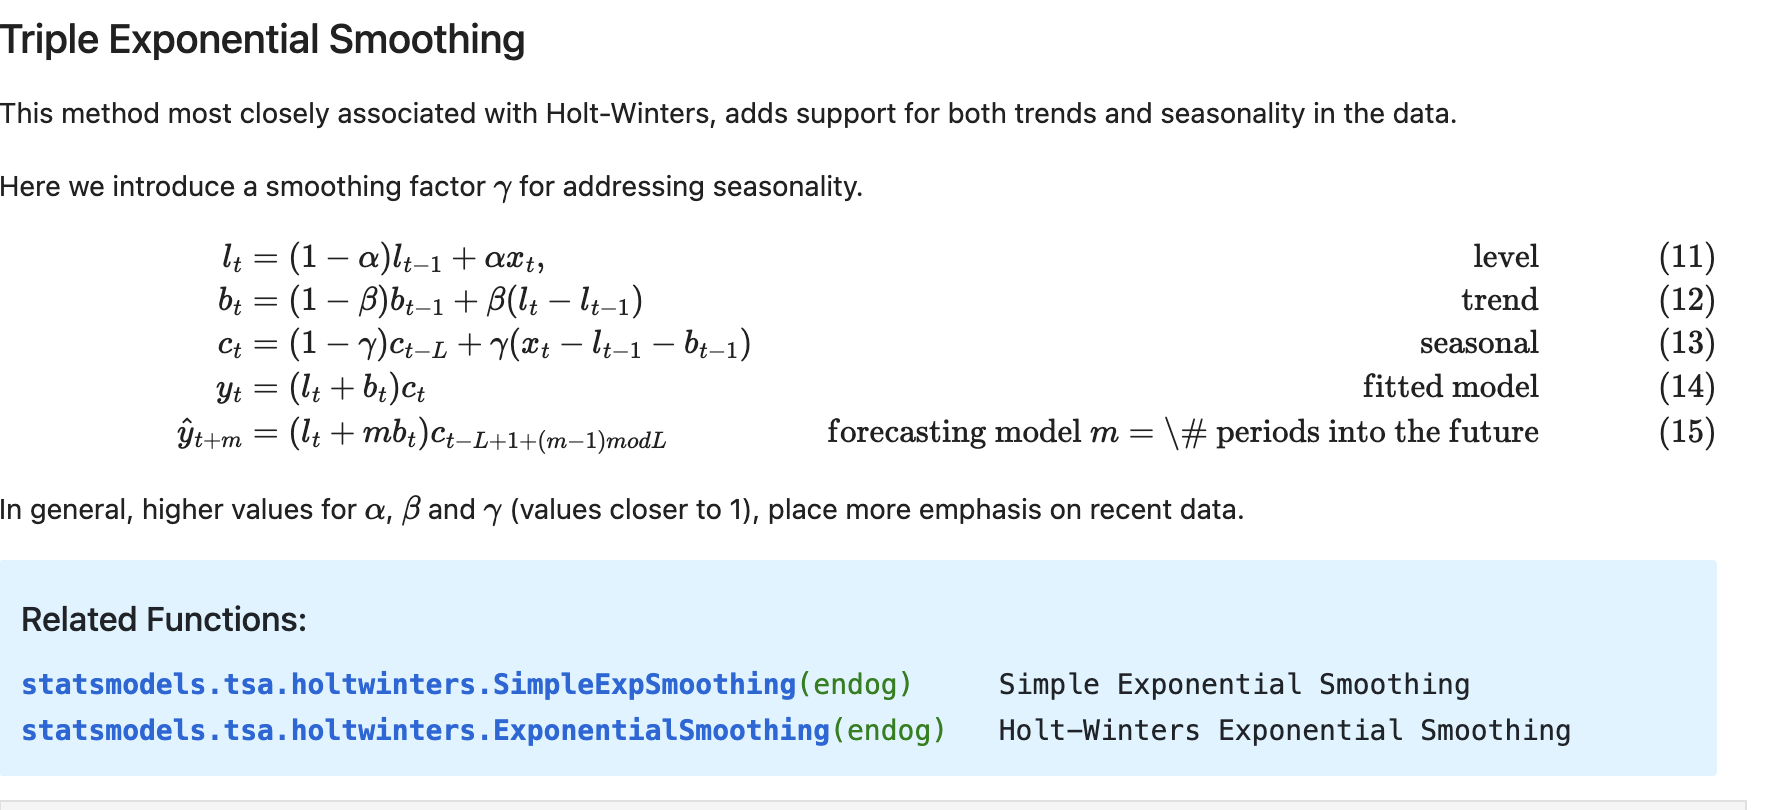

In [71]:
df['TESAdd'] = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues

df.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd,DESMul,TESAdd
Order Date,,,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443,7335.675142,6790.384086
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556,6227.217244,2880.555398
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615,12683.059255,10091.659067
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469,13873.059436,9156.845289
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718,13809.276104,11687.553932


<Axes: xlabel='Order Date'>

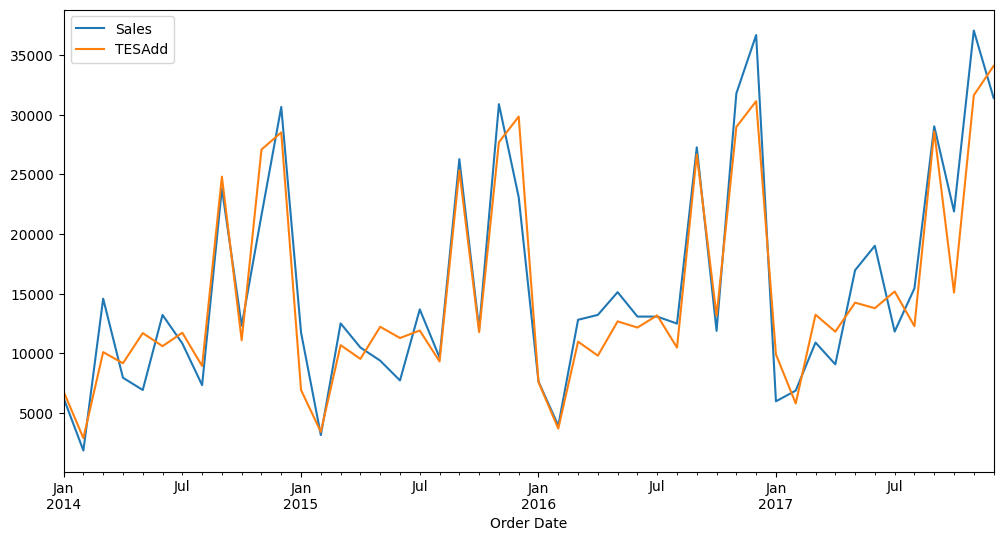

In [72]:
df[['Sales', 'TESAdd']].plot(figsize=(12, 6))

Let's check multiplicative model

In [73]:
df['TESMul'] = ExponentialSmoothing(df['Sales'], trend='add', seasonal='mul', seasonal_periods=12).fit().fittedvalues

df.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd,DESMul,TESAdd,TESMul
Order Date,,,,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443,7335.675142,6790.384086,7711.972734
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556,6227.217244,2880.555398,3953.491893
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615,12683.059255,10091.659067,10099.098151
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469,13873.059436,9156.845289,9393.019754
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718,13809.276104,11687.553932,11273.954916


<Axes: xlabel='Order Date'>

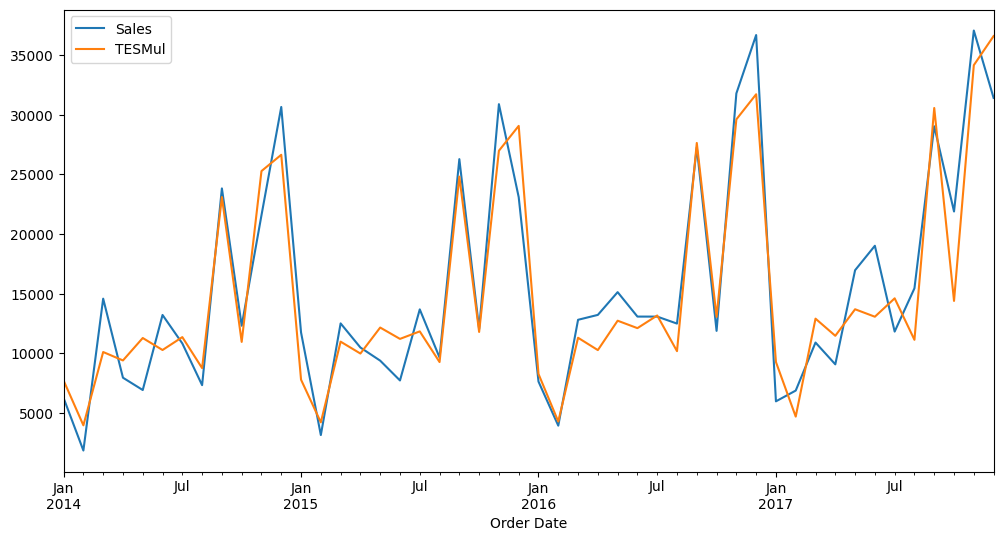

In [74]:
df[['Sales', 'TESMul']].plot(figsize=(12, 6))

<Axes: xlabel='Order Date'>

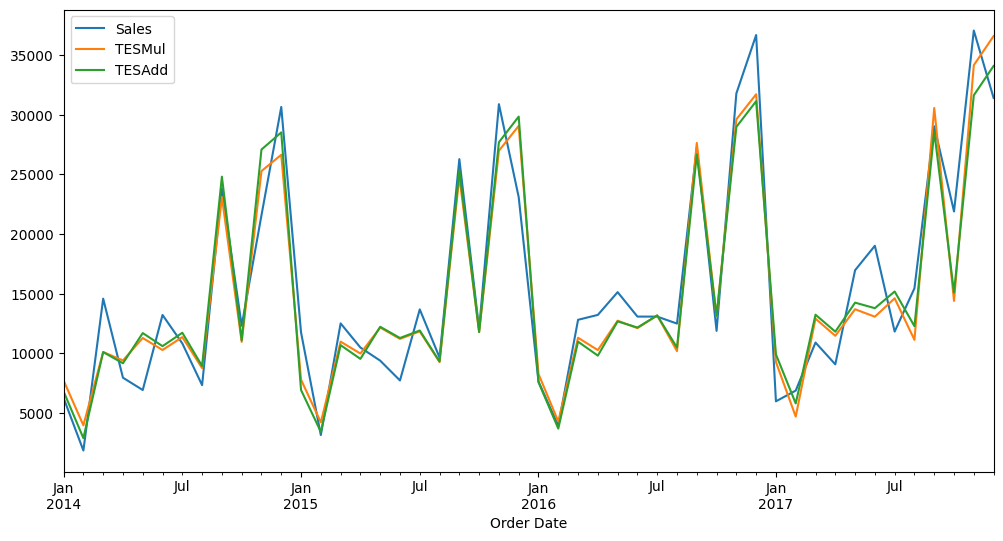

In [75]:
df[['Sales', 'TESMul', 'TESAdd']].plot(figsize=(12, 6))

Key Differences Between MA and EWMA:
Weighting:

MA: All data points in the window have equal weight.

EWMA: More recent data points have higher weight, while older data points have exponentially decreasing weight.

Responsiveness:

MA: It reacts more slowly to recent changes because of the equal weight distribution.

EWMA: It reacts faster to recent changes, making it more sensitive to the latest data.

Usage:

MA: Typically used when you want a smoother, less reactive average, especially in situations where each data point is equally important.

EWMA: Ideal when you want to focus more on recent trends and give less importance to older data.

Smoothing:

MA: Can be more "laggy" because of the equal weight and the window size.

EWMA: Because of the exponentially decaying weights, it smooths out data but remains more responsive to changes over time.

In summary, MA is good for smoothing out data without prioritizing recent information, while EWMA is better for highlighting recent changes and trends, making it more dynamic and responsive.

o illustrate how a laggy behavior shows up in a Simple Moving Average (SMA), let's visualize the effect with a simple example.

Imagine we have some data points (let's say, stock prices), and we compute a moving average over a 5-day period.

Here's a simple example:
Raw Data (Stock Prices):
10, 12, 15, 18, 20, 22, 24, 30, 28, 27

Now, let’s compute the Simple Moving Average (SMA) for a 5-day period:

SMA for Day 5: Average of Day 1 to Day 5 → (10 + 12 + 15 + 18 + 20) / 5 = 15

SMA for Day 6: Average of Day 2 to Day 6 → (12 + 15 + 18 + 20 + 22) / 5 = 17.4

SMA for Day 7: Average of Day 3 to Day 7 → (15 + 18 + 20 + 22 + 24) / 5 = 19.8

SMA for Day 8: Average of Day 4 to Day 8 → (18 + 20 + 22 + 24 + 30) / 5 = 22.8

SMA for Day 9: Average of Day 5 to Day 9 → (20 + 22 + 24 + 30 + 28) / 5 = 24.8

SMA for Day 10: Average of Day 6 to Day 10 → (22 + 24 + 30 + 28 + 27) / 5 = 26.2

As you can see, the Simple Moving Average lags behind the most recent data. When there is a sudden rise or fall in stock prices (like the jump from 24 to 30 between Day 7 and Day 8), the SMA smooths out the fluctuation and doesn't immediately reflect the change. Instead, it reacts slowly, taking into account the older data points.



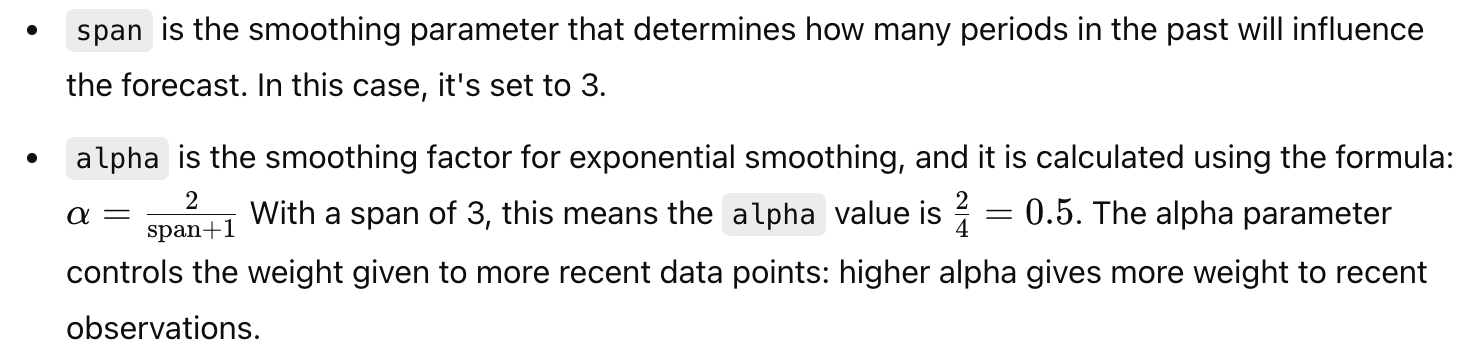

This line calculates the exponentially weighted moving average (EWMA) for the 'Sales' column of the df DataFrame using pandas.

ewm(alpha=alpha, adjust=False) creates an EWMA object with the specified alpha value.

alpha=alpha applies the smoothing factor you defined earlier.

adjust=False means that the calculation does not apply an adjustment for bias toward earlier values, which is the default behavior when adjust=True.

.mean() calculates the exponentially weighted moving average (EWMA) of the Sales column and stores it in a new column called 'EWMA3'.

This line performs simple exponential smoothing (SES) on the Sales column using the SimpleExpSmoothing model from statsmodels.

SimpleExpSmoothing(df['Sales']) initializes the SES model with the Sales column.

.fit(smoothing_level=alpha, optimized=False) fits the SES model using the provided smoothing level (alpha).

smoothing_level=alpha sets the smoothing factor to the value of alpha (which is 0.5).

optimized=False means that the smoothing parameter alpha is fixed and not optimized by the model (i.e., it's not automatically adjusted by the algorithm).

.fittedvalues retrieves the smoothed values that the model produces.

.shift(-1) shifts the fitted values by one period forward (by -1). This is likely done to align the forecasted values with the next period.

Exponential smoothing is a useful technique in time series forecasting when you want to predict future values based on past observations, particularly when the time series data exhibits trends or seasonality. Here are the scenarios in which exponential smoothing is most commonly used:

1. When the Data Has a Trend:

If the time series exhibits a trend (either upward or downward), exponential smoothing helps to smooth out the fluctuations while accounting for this trend.

For example, sales data over time that consistently increases or decreases is a good candidate for exponential smoothing.

Method to Use:

Holt’s Linear Trend Model (or double exponential smoothing) can capture and forecast both the level and the trend.

2. When the Data Has Seasonality:

If your time series data is affected by seasonal patterns (e.g., monthly, weekly, or yearly seasonality), exponential smoothing can be adjusted to account for these repeated patterns.

For instance, retail sales data with spikes around holidays or specific months each year can be modeled effectively using exponential smoothing methods.

Method to Use:

Holt-Winters’ Seasonal Model (triple exponential smoothing) incorporates both trend and seasonality into the forecasting model.

3. When You Have Limited Historical Data:

Exponential smoothing is often preferred when you have relatively limited historical data and cannot rely on complex models (like ARIMA or machine learning models) due to the lack of data.

The method is simple, requires fewer parameters, and works well for short- to medium-term forecasting.

4. When You Need a Model with Few Parameters:

Exponential smoothing models are relatively easy to implement and don’t require too many parameters. They work well when you want a quick, interpretable forecasting model without needing a large number of inputs.

5. When You Expect the Most Recent Observations to Have More Influence:

Exponential smoothing is based on the principle that the most recent data points should have more weight when forecasting future values. If this assumption holds true in your scenario, exponential smoothing is appropriate.

6. When Data is Noisy:

If the data is noisy (i.e., there are a lot of random fluctuations), exponential smoothing can help smooth out the noise and create a clearer trend for forecasting. The technique is effective at filtering out short-term irregularities to focus on the underlying pattern.

7. When You Have Real-Time Data:

Exponential smoothing works well for real-time or dynamic forecasting where you continuously receive new data and need to update forecasts on the fly.

This is often used in situations like inventory management, where stock levels and sales data need to be adjusted and predicted continuously.

